# 2) Exploration

As you can see in the description of the data, it contains 8 variables:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

In [4]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/MyDrive/DATA' #put the name of you working directory here

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df = pd.read_csv(relative_path + 'data.csv', encoding='latin', dtype={'CustomerID': str}) 
df_dropna.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Quantity,UnitPrice
count,406829.000000,406829.000000,406829.000000
mean,278048.159318,12.061303,3.460471
std,152744.019884,248.693370,69.315162
min,0.000000,-80995.000000,0.000000
25%,147749.000000,2.000000,1.250000
50%,284435.000000,5.000000,1.950000
75%,409528.000000,12.000000,3.750000
max,541908.000000,80995.000000,38970.000000


## 2.1) Number of customers (/products/countries)

**Task:** Find the numbers of customers, products and transactions (assuming each transaction corresponds to a unique InvoiceNo).




In [5]:
print(df_dropna.CustomerID.unique().shape[0])
print(df_dropna.StockCode.unique().shape[0])
print(df_dropna.InvoiceNo.unique().shape[0])


4372
3684
22190


In [6]:
print('Unique Customers {} \n  unique products {} \n  unique transactions {}'.format(df_dropna.CustomerID.unique().shape[0],df_dropna.StockCode.unique().shape[0],df_dropna.InvoiceNo.unique().shape[0]))


Unique Customers 4372 
  unique products 3684 
  unique transactions 22190


## 2.2) Products per transaction

**Task:** Find the numbers of products in each transaction, then show the top 10 transactions by number of products using `.groupby`. Here, one product, has one StockCode

In [7]:
df_dropna[['InvoiceNo','StockCode']].groupby('InvoiceNo').nunique()['StockCode'].sort_values(ascending=False).head(10)

InvoiceNo
576339    541
579196    529
580727    525
578270    439
573576    434
567656    419
567183    386
575607    375
571441    363
572552    352
Name: StockCode, dtype: int64

## 2.3) Transactions per country

Find the numbers of unique invoice numbers per country, using `.groupby` and `.nunique`

In [9]:
# transactions per country
transPerCountry = df_dropna[['InvoiceNo','Country']].groupby('Country').nunique()['InvoiceNo'].sort_values(ascending=False)

In [10]:
transPerCountry

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Greece                      6
Canada                      6
Israel                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

In [11]:
# choropleth map
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = transPerCountry.index,
locationmode = 'country names', z = transPerCountry,
text = transPerCountry.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Number of transactions per country',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

## 2.4) Cancelling orders

Among the observations, some have negative quantities. They correspond to cancelling orders (transactions). When a user cancels an order, instead of removing the original transaction (with positive quantity), one stores a new transaction with negative quantity. Hence, both quantities will cancel out and the stock balance will be unchanged.

**Task:** Compute the number of cancelled transactions (cancelled transactions' InvoiceNo contain letter 'C'). What percentage does it represents? Here we mean the unique cancled transactions vs total unique transactions

In [12]:
## Number of cancelling transactions here

df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].describe()

,Unnamed: 0,Quantity,UnitPrice
count,9288.000000,9288.000000,9288.000000
mean,257872.809216,-29.885228,48.393661
std,150143.638467,1145.786965,666.600430
min,141.000000,-80995.000000,0.010000
25%,127557.750000,-6.000000,1.450000
50%,255476.500000,-2.000000,2.950000
75%,383071.250000,-1.000000,5.950000
max,541717.000000,-1.000000,38970.000000


Cancelling orders occur due to customer wishes or product discounts:

In [13]:
df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [14]:
df_dropna[df_dropna.Quantity<0].InvoiceNo.unique().shape[0]/df_dropna.InvoiceNo.unique().shape[0]

0.16466876971608832

In [15]:
orders = df_dropna.InvoiceNo.unique()
n_orders = orders.shape[0]
n_cancelled_orders = pd.Series(orders).apply(lambda x: 'C' in x).sum()
print('Number of cancelled transactions: {}/{} ({:0.2f}%)'.format(n_cancelled_orders, n_orders,\
n_cancelled_orders/n_orders*100))

Number of cancelled transactions: 3654/22190 (16.47%)


When there is a cancelling order, it's often the case that part of the command has been canceled. There is a counterpart which is a another purchase order with the same CustomerID, Description and UnitPrice, but different InvoiceID and date.

Cancellations without a counterpart are problaly due to the fact that the purchase commands happen before the beginning date of the dataset, or they correspond to discounts.

We will create a new variable `QuantityCanceled` in the dataframe that indicate if part of the command has been canceled. 

We will also check the two cases:

* a cancel order exists without counterpart
* there's at least one counterpart 

The index of the corresponding cancel orders are respectively kept in the `doubtful_entry` and `entry_to_remove` lists.

***Note***: Just understand and run this code, but note that it can take some time, like 10-15 minutes.

In [17]:
idx = pd.IndexSlice
df_customer_stockcode = df_dropna.set_index(['CustomerID', 'StockCode'], append=True)

import timeit

start = timeit.default_timer()

# Note: we don't consider discount entries
# doubtfull_entry: cancel entries with no counterpart
# entry_to_remove: cancel entries with counterparts and there is at least one entry with higher quantity!

df_cleaned = df_dropna.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_dropna.iterrows():

    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df_customer_stockcode.loc[idx[:, col['CustomerID'], col['StockCode']], :]
    df_test = df_test[(df_test['InvoiceDate'] < col['InvoiceDate']) & (df_test['Quantity']   > 0)]
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH only one counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0][0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0, ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind[0], 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  144.64980652000003


In [18]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


**Task**: evaluate lengths of `entry_to_remove` and `doubtfull_entry`. Delete corresponding rows from `df_cleaned`

In [19]:
df_cleaned

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
...,...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0


In [20]:
print(len(entry_to_remove), len(doubtfull_entry))
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)
df_cleaned.drop(doubtfull_entry, axis=0, inplace=True)

7543 1229


**Task**: show the remaining cancellations not counting discounts:

In [21]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['Description'] != 'Discount')]
print('nb of entries to delete: {}'.format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 56


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
36588,58496,C541245,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-12,2011-01-16 12:40:00,4.25,15535,United Kingdom,0
48732,77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
58023,90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
74517,111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
77480,116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0


We can see that there is cases where the amount of cancelation is greater than the sum of previous purchases. However, we skip this and leave it like this.

In [22]:
df_cleaned[(df_cleaned['CustomerID'] == '14048') & (df_cleaned['StockCode'] == '22464')] 

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
53768,84247,543371,22464,HANGING METAL HEART LANTERN,3,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
53780,84259,543371,22464,HANGING METAL HEART LANTERN,1,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
74517,111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0


## 2.5) StockCode with letters

As we have seen, there are stockCode values that aren't numbers, like 'D' for discount. 
Use <b>regular expressions</b> to catch all of the existing codes in order to investigate what other non-numeric values we have.
Investigate dependence between these codes and `Description` feature.

You can see how to use Regular expressions (or RegExp) here : <a href ='https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions'>Tutorial Regexp</a>.

If you want to test your RegExps you can use this very useful website : https://regexr.com/

In [23]:
import re
list_special_codes = []
for i in df_cleaned['StockCode'].unique(): 
  match = re.search(r'^\d+',i)
  if match: continue
  else: list_special_codes.append(i)
list_special_codes
#type(list_special_codes)

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [24]:
#alternatively
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains("^[^\d]", regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [25]:
#Alexei 
for i, code in enumerate(list_special_codes):
  print('{:2}{:3}{:15}{:5}{}'.format(i, ' :', code, '-->', df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))



 0 : POST           -->  POSTAGE
 1 : D              -->  Discount
 2 : C2             -->  CARRIAGE
 3 : M              -->  Manual
 4 : BANK CHARGES   -->  Bank Charges
 5 : PADS           -->  PADS TO MATCH ALL CUSHIONS
 6 : DOT            -->  DOTCOM POSTAGE


In [26]:
#Fanbo
for code in list_special_codes:
    print(f"{code} -> {df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]}")


POST -> POSTAGE
D -> Discount
C2 -> CARRIAGE
M -> Manual
BANK CHARGES -> Bank Charges
PADS -> PADS TO MATCH ALL CUSHIONS
DOT -> DOTCOM POSTAGE


## 2.6) Basket prices

**Task**: create a feature `TotalPrice` for the dataframe, which is the total price for each line

In [27]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned['TotalPrice'][:5]

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalPrice, dtype: float64

Each entry of the dataframe indicates prices for a single kind of product, so an order may be split on several lines. We can collect all the commands during a single order (same InvoiceNo) to recover the total order price. 

**Task**: save result in a dataframe `basket_price`. It should have features: `CustomerID`, `InvoiceNo`, `Basket Price` and `InvoiceDate`

In [28]:
# sum the commands for each order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
# command date
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
# keep only positive purchases
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000001280


In [29]:
basket_price.head()

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000


Purchases can be divided according to total prices. Run the code:

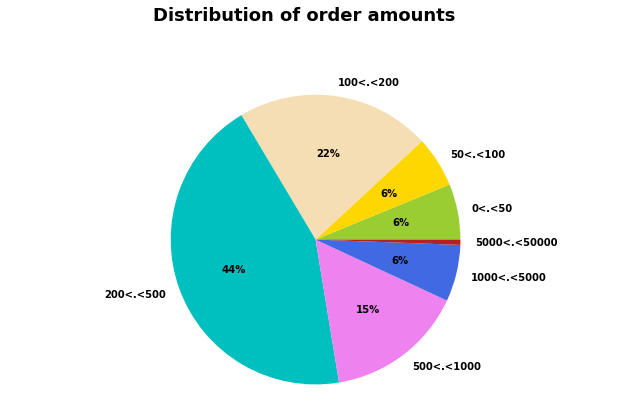

In [30]:
import matplotlib.pyplot as plt

# Define price ranges
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Distribution of order amounts    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

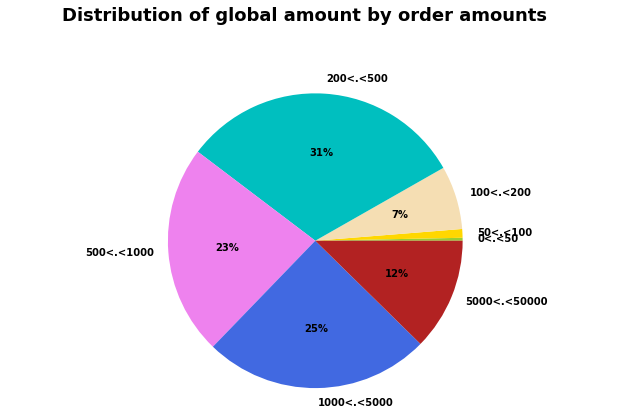

In [31]:
#for loop to save both number of orders per class and turnover per class:

# Define price ranges
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
sum_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
    sum = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].sum()    
    sum_price.append(sum)






#Second graph :
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = sum_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of global amount by order amounts", ha='center', fontsize = 18);

## 2.7) Save data
Save preprocessed data to the file `data_cleaned.csv` and `basket_price.csv`

In [32]:
df_cleaned.to_csv('/content/drive/My Drive/data_cleaned.csv')
basket_price.to_csv('/content/drive/My Drive/basket_price.csv')